In [1]:
%run requirements.ipynb
%run config.ipynb
%run module_preprocess.ipynb
%run module_feature_extraction.ipynb
%run module_training.ipynb

In [4]:
area0 = pd.read_csv("CSV/smartmeterhalf/smart_meter_0_1.csv")
area1 = pd.read_csv("CSV/smartmeterhalf/smart_meter_0_2.csv")

## check vavlue

In [9]:
area0.shape, area1.shape

((10748400, 5), (10748400, 5))

In [5]:
area0.head(2)

,MeterID,Day,Time,Electricity,FDI
0,1236,2009-07-15,1,0.134070,True
1,1236,2009-07-15,2,0.129562,True


In [13]:
data = pd.concat([area0, area1])

In [17]:
data['MeterID'].value_counts()

1002    25440
1893    25440
1865    25440
1867    25440
1869    25440
        ...  
1468    25440
1469    25440
1471    25440
1472    25440
2724    25440
Name: MeterID, Length: 845, dtype: int64

In [18]:
e = data.to_csv(index=False)
f = open('CSV/smart_meter_sample_area0_area1.csv','w')
f.write(e) #Give your csv text here.
f.close()

In [4]:
origin_meter_data_group = read_smart_meter_csv(2,'CSV/smart_meter_sample_area0_area1.csv' )
smart_meter_data_group = read_smart_meter_csv(2,'CSV/smart_meter_sample_area0_area1.csv' )
# the value of x is divided by its
# maximum and scaled into a value between zero and one
# normalized smart_meter_data_group by divide the max eletricity of the meter
for area in smart_meter_data_group:
    for meter in area['fdi']:
        meter_numpy = meter['Electricity'].to_numpy()
        meter['Electricity'] = meter_numpy / meter_numpy.max()
    for meter in area['normal']:
        meter_numpy = meter['Electricity'].to_numpy()
        meter['Electricity'] = meter_numpy / meter_numpy.max()
smart_meter_data_group[0]['fdi'][0]['Electricity'].to_numpy()

start area  0
start area  1
start area  0
start area  1


array([0.03654133667327904, 0.03531269191667239, 0.030966420614507387,
       ..., 0.04361966398335228, 0.03120148357601003,
       0.011117897020210493], dtype=object)

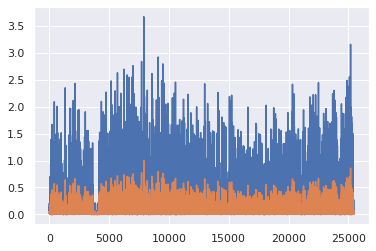

In [24]:
# make sure there is difference between the observe_meter_data_group and smart_meter_data_group
plt.plot(origin_meter_data_group[0]["fdi"][0]["Electricity"].tolist())
plt.plot(smart_meter_data_group[0]["fdi"][0]["Electricity"].tolist()) 

## cluster and plot vvalue

In [5]:
v_value_list = calc_v_value(smart_meter_data_group, NUMBER_OF_DAYS)

  0%|          | 0/2 [00:00<?, ?it/s]

finish fdi
finish normal
finish fdi
finish normal


In [6]:
v_value = pd.DataFrame(v_value_list)

In [29]:
v_value.columns

Index(['MeterID', 'Day', 'FDI', 'Tmax1', 'Tmax2', 'Tmin1', 'Cmax1', 'Cmax2', 'Cmin1'], dtype='object')

In [36]:
def plot_v_value(user):
    print(v_value['FDI'].loc[user*530+1], v_value['FDI'].iloc[user*530:(user+1)*530].value_counts())
    plt.plot(v_value["Tmax1"][user*530:(user+1)*530])
    plt.plot(v_value["Tmax2"][user*530:(user+1)*530])
    plt.plot(v_value["Tmin1"][user*530:(user+1)*530])
    plt.plot(v_value["Cmax1"][user*530:(user+1)*530])
    plt.plot(v_value["Cmax2"][user*530:(user+1)*530])
    plt.plot(v_value["Cmin1"][user*530:(user+1)*530])
    plt.show()

True True    530
Name: FDI, dtype: int64


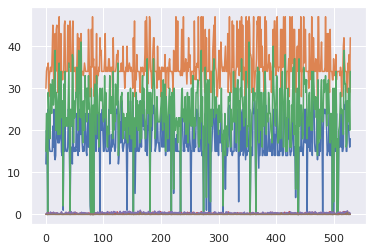

None
True True    530
Name: FDI, dtype: int64


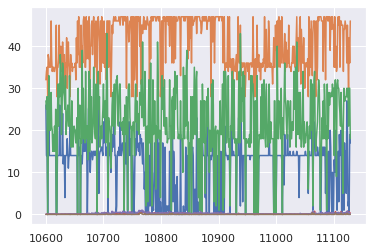

None
True True    530
Name: FDI, dtype: int64


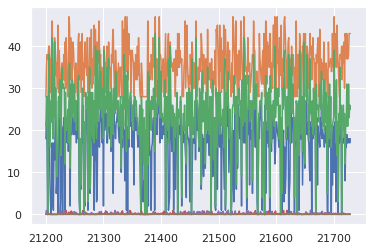

None
False False    530
Name: FDI, dtype: int64


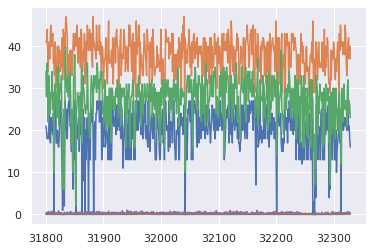

None
False False    530
Name: FDI, dtype: int64


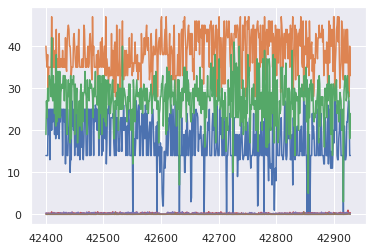

None
False False    530
Name: FDI, dtype: int64


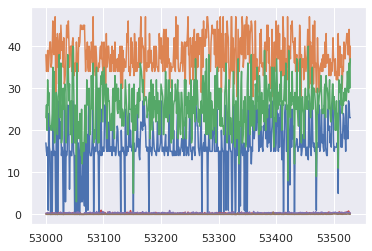

None
False False    530
Name: FDI, dtype: int64


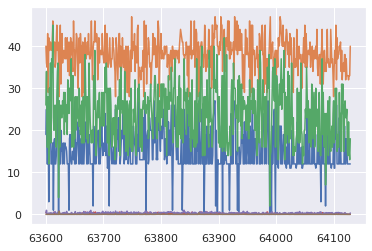

None
False False    530
Name: FDI, dtype: int64


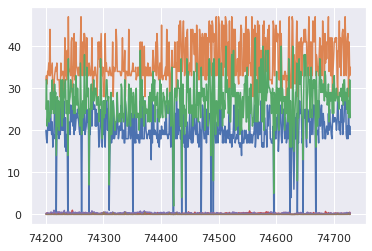

None
False False    530
Name: FDI, dtype: int64


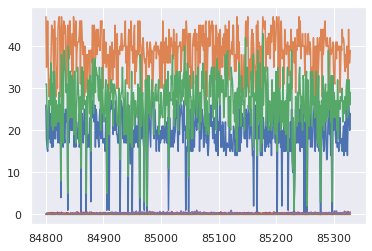

None
False False    530
Name: FDI, dtype: int64


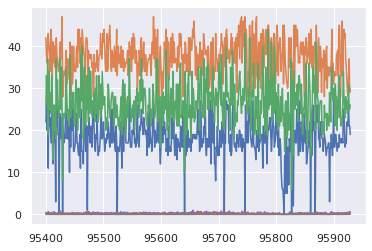

None


In [37]:
for i in range(10):
    print(plot_v_value(i*20))

In [11]:
v_value[['Tmax1', 'Tmax2', 'Tmin1', 'Cmax1', 'Cmax2', 'Cmin1']].iloc[:4225*530*48].to_numpy().shape

(447320, 6)

In [ ]:
# silhouette index
X = v_value[['Tmax1', 'Tmax2', 'Tmin1', 'Cmax1', 'Cmax2', 'Cmin1']].iloc[:4225*530*48].to_numpy()
Y = v_value['FDI'].to_numpy()
silhouette_avg = []
for i in tq.tqdm(range(1,2)):
    kmeans_fit = KMeans(n_clusters = i).fit(X)
    silhouette_avg.append(silhouette_score(X, Y))
plt.plot(range(1,5), silhouette_avg)

  0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# silhouette index
X = v_value[['Cmax1', 'Cmax2', 'Cmin1']]
Y = v_value['FDI']
silhouette_avg = []
for i in tq.tqdm(range(1,10)):
    kmeans_fit = KMeans(n_clusters = i).fit(X)
    silhouette_avg.append(silhouette_score(X, Y))
plt.plot(range(1,6), silhouette_avg)

In [ ]:
# silhouette index
X = v_value[['Tmax1', 'Tmax2', 'Tmin1']]
Y = v_value['FDI']
silhouette_avg = []
for i in tq.tqdm(range(1,10)):
    kmeans_fit = KMeans(n_clusters = i).fit(X)
    silhouette_avg.append(silhouette_score(X, Y))
plt.plot(range(1,6), silhouette_avg)

## plot one day v-value

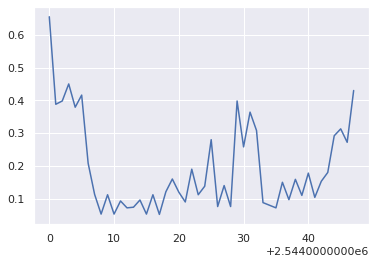

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

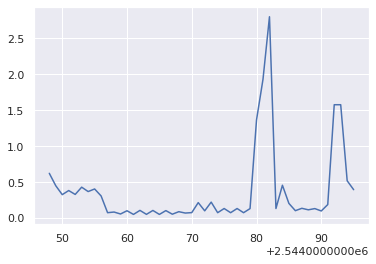

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

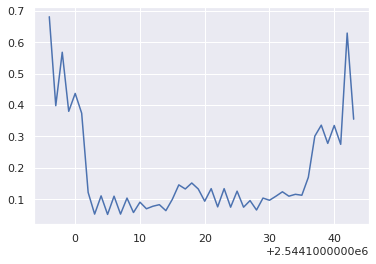

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

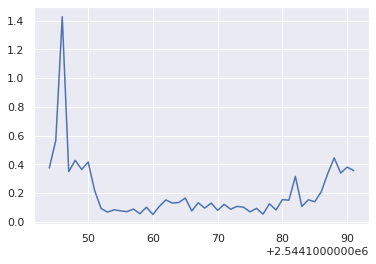

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

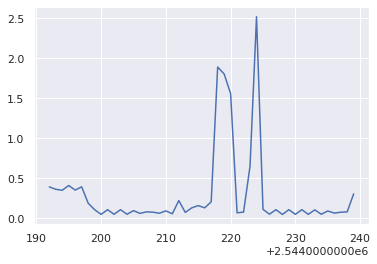

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

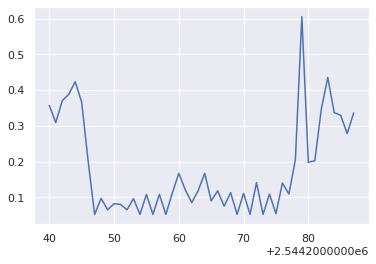

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

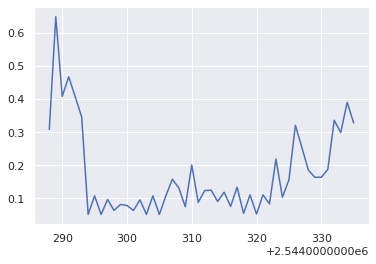

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

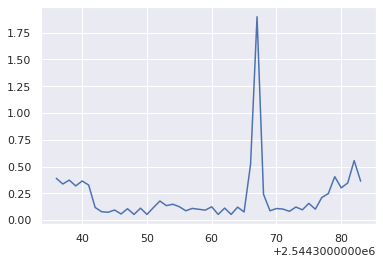

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

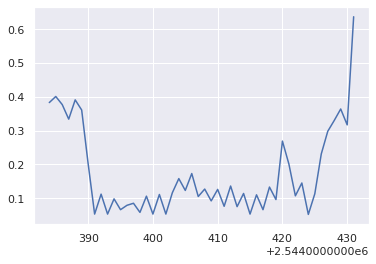

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

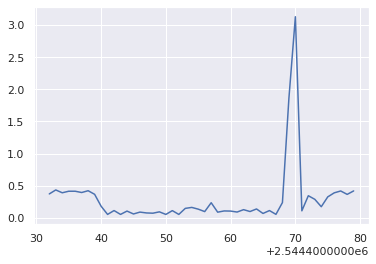

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

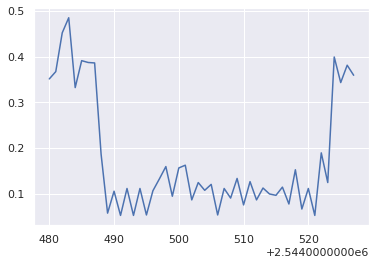

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

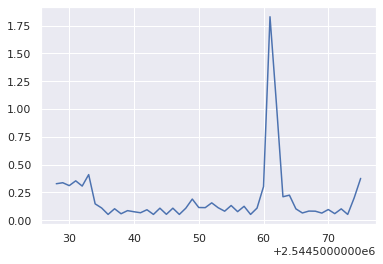

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

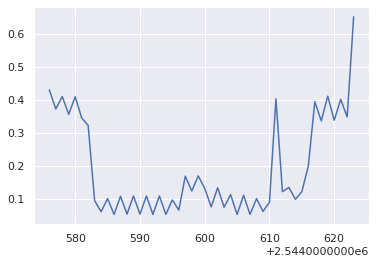

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

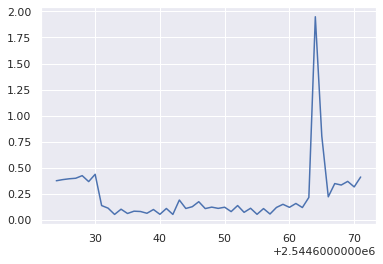

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

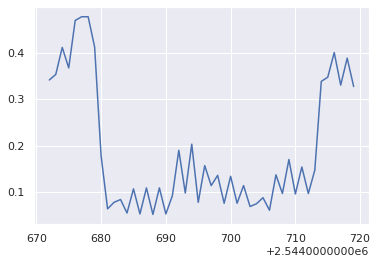

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

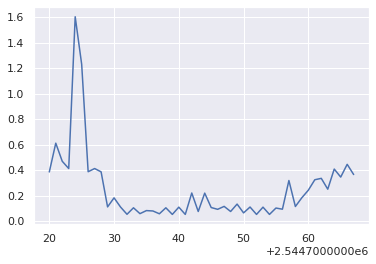

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

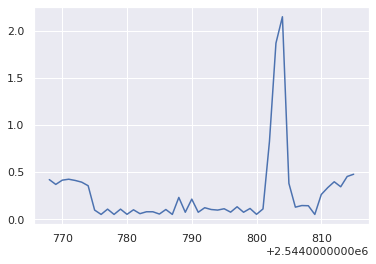

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

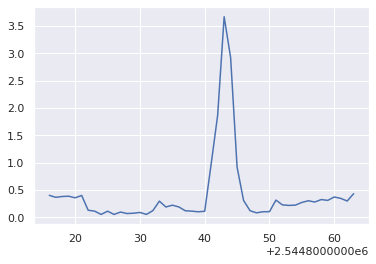

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

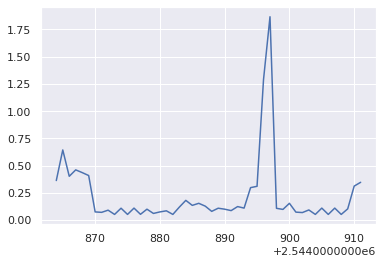

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

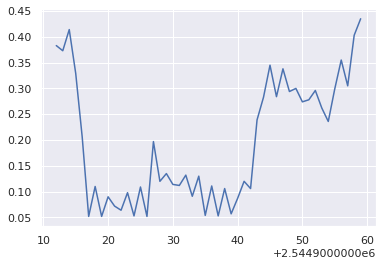

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [20]:
base = 100*530*48
for i in range(20):
    plt.plot(area0['Electricity'][base + i*48: base +(i+1)*48])
    plt.show()
    display(area0['FDI'][base + i*48: base +(i+1)*48].to_numpy())

In [12]:
cp = area0.copy(deep=True)
    
meter_numpy = cp['Electricity'].to_numpy()
cp['Electricity'] = meter_numpy / meter_numpy.max()
meter_numpy = cp['Atk_Elec'].to_numpy()
cp['Atk_Elec'] = meter_numpy / meter_numpy.max()

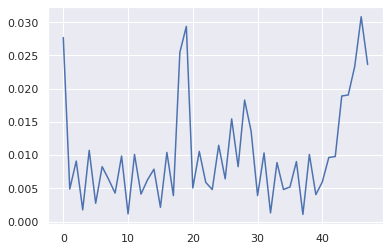

In [13]:
for i in range(1):
    plt.plot(cp['Electricity'][i*48:(i+1)*48])
    plt.show()

In [22]:
v_value = pd.read_csv('CSV/v_value.csv')

In [29]:
v_value[:4]

,MeterID,Day,FDI,Tmax1,Tmax2,Tmin1,Cmax1,Cmax2,Cmin1
0,1002,2009-07-15,False,19,46,37,0.026737,0.028060,0.000975
1,1002,2009-07-16,False,19,35,21,0.065311,0.021794,0.007450
2,1002,2009-07-17,False,20,30,26,0.066147,0.033839,0.006058
3,1002,2009-07-18,False,16,37,23,0.040524,0.024648,0.002019


In [38]:
temp['Tmax1'][0]

19

In [44]:
temp['Tmax1']

1    19
Name: Tmax1, dtype: int64

In [46]:
v_value.shape

(2239250, 9)

In [55]:
for i in v_value.columns:
    print(v_value[i].max(), v_value[i].min())

7443 1002
2010-12-31 2009-07-15
True False
27 0
47 28
46 0
1.0 0.0
1.0 0.0
1.0 0.0


In [57]:
a = []
for i in range(v_value.shape[0]):
    temp = v_value.iloc[[i]]
    if temp['Tmax1'][i] > 12 and temp['Tmax1'][i] < 20 and temp['Tmax2'][i] > 30 and temp['Tmax2'][i] < 39 and temp['Tmin1'][i] > 23 and temp['Tmin1'][i] < 29:
        a.append(i)

KeyboardInterrupt: 

86208
898


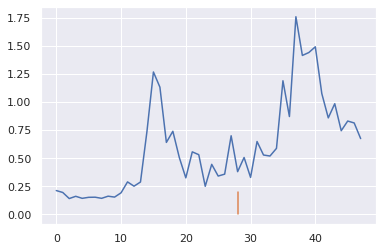

86400
900


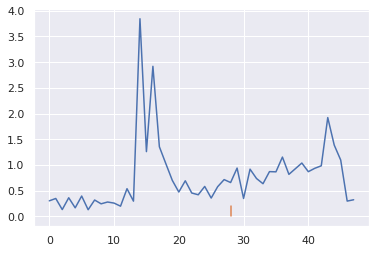

In [85]:

for i in a:
    if i < 890 or i > 900:
        continue
    base = i*48
    print(base + i*48)
    print(i)
    if any(area0['FDI'][base + i*48: base +(i+1)*48]) == True:
        print('is FDI')
        continue
    plt.plot(np.arange(48), area0['Electricity'][base + i*48: base +(i+1)*48])
    plt.plot([28, 28], [0, 0.2])
    plt.show()

In [88]:
86208 / 48

1796.0

In [98]:
print(v_value.iloc[1796])
tmax1 = v_value.iloc[1796]['Tmax1']
tmax2 = v_value.iloc[1796]['Tmax2']
tmin1 = v_value.iloc[1796]['Tmin1']

MeterID          1005
Day        2010-02-06
FDI             False
Tmax1              15
Tmax2              37
Tmin1              23
Cmax1        0.088149
Cmax2        0.122337
Cmin1        0.017407
Name: 1796, dtype: object


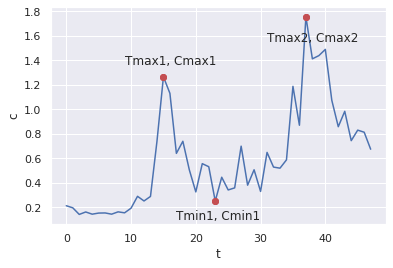

In [122]:
base = 86208
# display(area0[base:base+24])
plt.plot(np.arange(48), area0['Electricity'][base: base + 48])
plt.plot([15, 15], [area0['Electricity'][base+tmax1], area0['Electricity'][base+tmax1]], 'ro')
plt.plot([37, 37], [area0['Electricity'][base+tmax2], area0['Electricity'][base+tmax2]], 'ro')
plt.plot([23, 23], [area0['Electricity'][base+tmin1], area0['Electricity'][base+tmin1]], 'ro')
plt.annotate("Tmax1, Cmax1", (9, area0['Electricity'][base+tmax1]+0.1))
plt.annotate("Tmax2, Cmax2", (31, area0['Electricity'][base+tmax2]-0.2))
plt.annotate("Tmin1, Cmin1", (17, area0['Electricity'][base+tmin1]-0.15))


plt.xlabel('t')
plt.ylabel('c')
plt.savefig('Image/v_value.png')